In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score





In [78]:
df = pd.read_csv("/content/Food_Delivery_Time_Prediction.csv")

In [79]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [80]:


df.shape



(200, 15)

In [81]:


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance,200.0,11.49805,6.841755,0.52,6.0900,10.265,16.4975,24.90
Delivery_Person_Experience,200.0,5.25000,2.745027,1.00,3.0000,5.000,8.0000,10.00
Restaurant_Rating,200.0,3.73850,0.703021,2.50,3.2000,3.800,4.3000,5.00
Customer_Rating,200.0,3.68650,0.697063,2.60,3.1000,3.700,4.3000,5.00
Delivery_Time,200.0,70.49495,29.830694,15.23,46.9975,72.775,96.6500,119.67
Order_Cost,200.0,1046.48870,548.568922,122.30,553.2700,1035.950,1543.1250,1997.42
Tip_Amount,200.0,46.61665,29.361706,1.24,21.6025,47.530,70.2450,99.74


**Basic Preprocessing**

In [83]:
print(f'Number of duplicates in this dataset: {df.duplicated().sum()}')
df = df.drop_duplicates()

Number of duplicates in this dataset: 0


**Checking The missing Values**

In [84]:
print(df.isnull().sum().sort_values(ascending=False))

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


**Encode Categorical Variables**

In [85]:

data = pd.DataFrame({
    'Weather_Conditions': ['Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Sunny'],
    'Traffic_Conditions': ['Low', 'High', 'Medium', 'Medium', 'Low'],
    'Vehicle_Type': ['Bike', 'Car', 'Scooter', 'Bike', 'Car']
})


In [86]:

le = LabelEncoder()
for col in ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']:
    data[col + '_Label'] = le.fit_transform(data[col])

print(data)

  Weather_Conditions Traffic_Conditions Vehicle_Type  \
0              Sunny                Low         Bike   
1              Rainy               High          Car   
2             Cloudy             Medium      Scooter   
3              Rainy             Medium         Bike   
4              Sunny                Low          Car   

   Weather_Conditions_Label  Traffic_Conditions_Label  Vehicle_Type_Label  
0                         2                         1                   0  
1                         1                         0                   1  
2                         0                         2                   2  
3                         1                         2                   0  
4                         2                         1                   1  


In [87]:
# Use get_dummies to one-hot encode
data_encoded = pd.get_dummies(data, columns=['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type'])

print(data_encoded)


   Weather_Conditions_Label  Traffic_Conditions_Label  Vehicle_Type_Label  \
0                         2                         1                   0   
1                         1                         0                   1   
2                         0                         2                   2   
3                         1                         2                   0   
4                         2                         1                   1   

   Weather_Conditions_Cloudy  Weather_Conditions_Rainy  \
0                      False                     False   
1                      False                      True   
2                       True                     False   
3                      False                      True   
4                      False                     False   

   Weather_Conditions_Sunny  Traffic_Conditions_High  Traffic_Conditions_Low  \
0                      True                    False                    True   
1                     False 

In [92]:
# Fill categorical columns with mode
for col in ['Weather_Conditions', 'Traffic_Conditions', 'Order_Time']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical column with median
df['Delivery_Person_Experience'] = df['Delivery_Person_Experience'].fillna(df['Delivery_Person_Experience'].median())

In [93]:
print(df.isnull().sum().sort_values(ascending=False))

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64


**Normalize/Standardize Numeric Columns**

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numerical columns from df
numerical_cols = df.select_dtypes(include=np.number).columns
data_to_scale = df[numerical_cols]

# Fit and transform
data_standardized = scaler.fit_transform(data_to_scale)

# Convert back to DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=numerical_cols)

print(data_standardized.head())

   Distance  Delivery_Person_Experience  Restaurant_Rating  Customer_Rating  \
0 -1.454738                   -0.456512           0.515500        -0.987317   
1  1.439192                    1.004325           1.085900         0.738511   
2 -0.666417                    1.369535          -0.625302        -0.412041   
3  0.335835                   -1.186930          -0.767902         0.019416   
4 -0.700119                    0.273907          -0.340101        -1.274955   

   Delivery_Time  Order_Cost  Tip_Amount  
0      -1.487932    0.501852    1.192403  
1      -0.264987   -1.634294   -0.600810  
2      -0.741529    1.092646    0.599332  
3       1.382411   -0.923323    1.113532  
4      -1.280915   -0.779755   -1.511757  


In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select only numerical columns from df
numerical_cols = df.select_dtypes(include=np.number).columns
data_to_scale = df[numerical_cols]

# Fit and transform
data_normalized = scaler.fit_transform(data_to_scale)

# Convert back to DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=numerical_cols)

print(data_normalized.head())

   Distance  Delivery_Person_Experience  Restaurant_Rating  Customer_Rating  \
0  0.043068                    0.333333               0.64         0.166667   
1  0.853158                    0.777778               0.80         0.666667   
2  0.263741                    0.888889               0.32         0.333333   
3  0.544299                    0.111111               0.28         0.458333   
4  0.254307                    0.555556               0.40         0.083333   

   Delivery_Time  Order_Cost  Tip_Amount  
0       0.105228    0.639319    0.815228  
1       0.453658    0.015951    0.282030  
2       0.317886    0.811724    0.638883  
3       0.923018    0.223426    0.791777  
4       0.164209    0.265322    0.011168  


**Exploratory Data Analysis (EDA)**

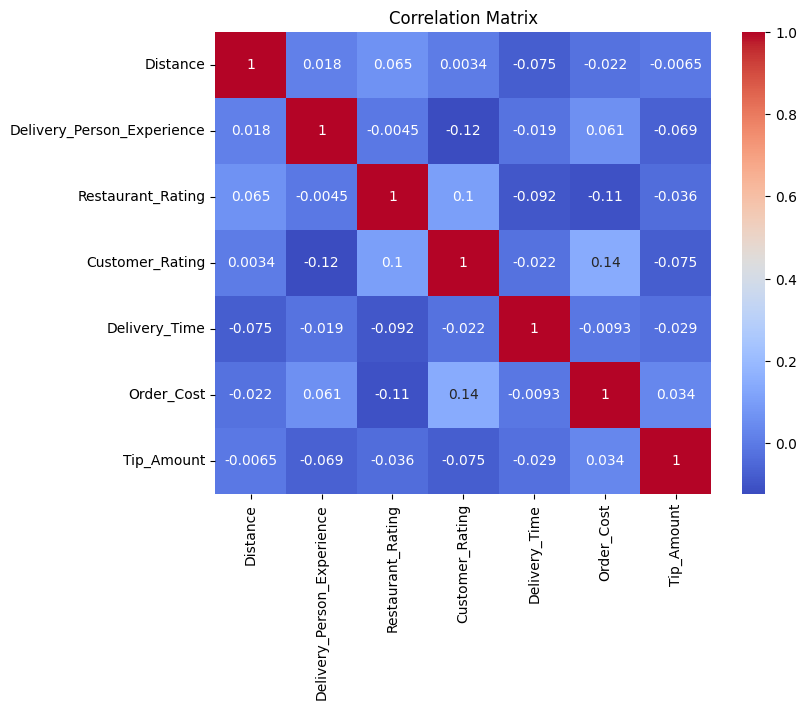

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
correlation = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


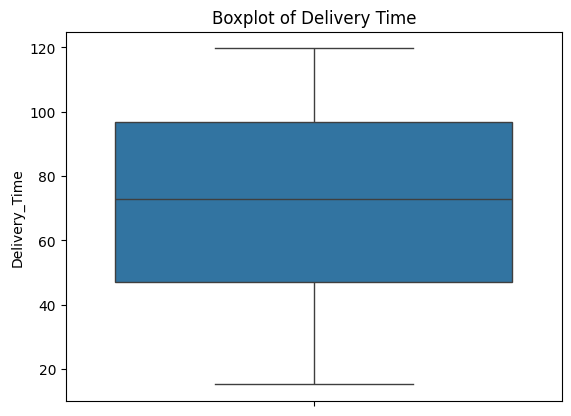

In [100]:
# Boxplot for Delivery Time
sns.boxplot(data=df, y='Delivery_Time')
plt.title("Boxplot of Delivery Time")
plt.show()

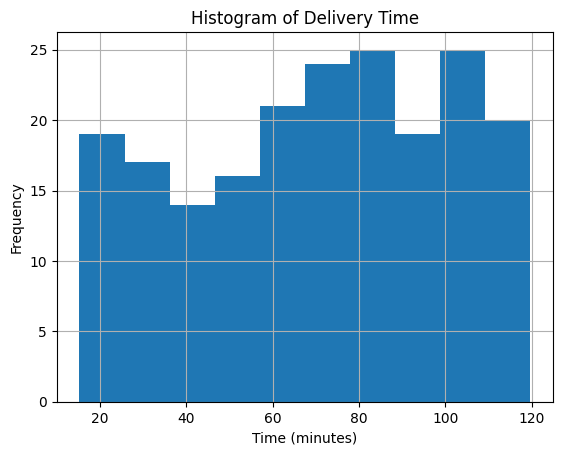

In [101]:
df['Delivery_Time'].hist(bins=10)
plt.title("Histogram of Delivery Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.show()

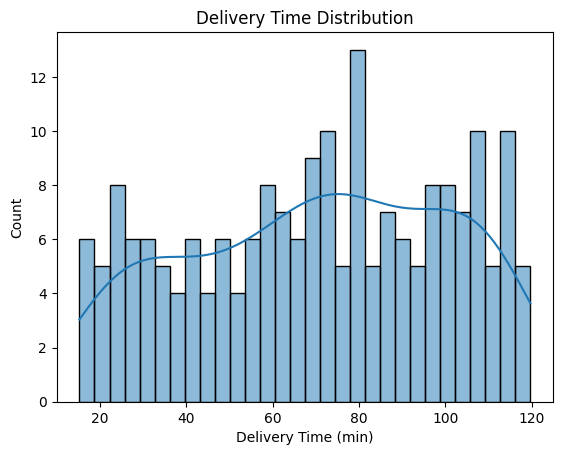

In [102]:
sns.histplot(df['Delivery_Time'], kde=True, bins=30)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (min)')
plt.show()

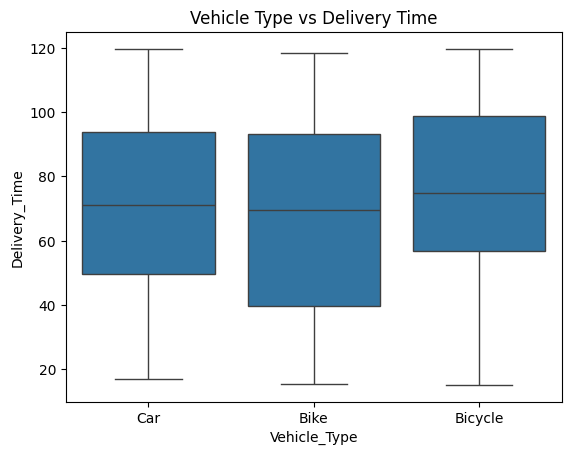

In [103]:
sns.boxplot(x='Vehicle_Type', y='Delivery_Time', data=df)
plt.title('Vehicle Type vs Delivery Time')
plt.show()

**Feature Engineering**

**Distance Calculation**

In [104]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [105]:
df[['Customer_Lat', 'Customer_Lng']] = df['Customer_Location'].str.extract(r'\((.*?), (.*?)\)').astype(float)
df[['Restaurant_Lat', 'Restaurant_Lng']] = df['Restaurant_Location'].str.extract(r'\((.*?), (.*?)\)').astype(float)

df['Distance'] = haversine_distance(
    df['Restaurant_Lat'], df['Restaurant_Lng'],
    df['Customer_Lat'], df['Customer_Lng']
)

**Time-Based Features**

In [106]:
time_mapping = {
    'Morning': 8,
    'Afternoon': 14,
    'Evening': 18,
    'Night': 22
}

df['Order_Time_Hour'] = df['Order_Time'].map(time_mapping)

df['Order_Time_Datetime'] = pd.to_datetime('2000-01-01 ' + df['Order_Time_Hour'].astype(str) + ':00:00')

df['Hour'] = df['Order_Time_Datetime'].dt.hour
df['DayOfWeek'] = df['Order_Time_Datetime'].dt.dayofweek
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

def is_rush_hour(hour):
    return 1 if (7 <= hour <= 9) or (17 <= hour <= 19) else 0

df['Rush_Hour'] = df['Hour'].apply(is_rush_hour)

#  Linear Regression Model

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [109]:
features = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Hour', 'DayOfWeek', 'Is_Weekend', 'Rush_Hour']
target = 'Delivery_Time'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete. X_train, X_test, y_train, y_test are now defined.")

Data splitting complete. X_train, X_test, y_train, y_test are now defined.


In [110]:
y_pred = lr_model.predict(X_test)


In [111]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 903.73
R-squared (R²) Score: 0.02


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
})
print(coeff_df)


                      Feature  Coefficient
0                    Distance    -0.014268
1  Delivery_Person_Experience    -1.006422
2           Restaurant_Rating    -2.476489
3             Customer_Rating    -1.916861
4                        Hour    -0.197819
5                   DayOfWeek     0.000000
6                  Is_Weekend     0.000000
7                   Rush_Hour     2.004481


In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 903.73
R² Score: 0.02


In [115]:
import joblib

joblib.dump(model, 'delivery_time_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Evaluate the Model**


In [119]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"📏 Mean Squared Error (MSE): {mse:.2f}")
print(f"📊 R-squared (R²): {r2:.2f}")
print(f"📐 Mean Absolute Error (MAE): {mae:.2f}")

📏 Mean Squared Error (MSE): 903.73
📊 R-squared (R²): 0.02
📐 Mean Absolute Error (MAE): 25.53


Logistic Regression Model (for Categorization)


In [137]:
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))
print("y_test dtype:", y_test.dtype)
print("y_pred dtype:", y_pred.dtype)


y_test unique values: [ 15.23  15.42  16.98  17.53  28.39  28.65  33.81  37.65  40.6   41.29
  46.33  50.11  53.53  56.78  60.18  63.79  66.84  68.07  71.98  72.91
  77.06  78.69  79.09  79.35  79.73  81.55  85.19  87.96  88.24  91.22
  93.2   95.64  99.99 103.35 109.15 111.18 112.83 114.   114.28 118.8 ]
y_pred unique values: [59.75598795 59.92925655 59.98375802 63.0467028  63.0666447  64.98762066
 65.21297309 65.51163854 65.51361219 65.93664636 66.28059165 66.60057435
 66.84701292 66.86732926 67.49827728 67.97589335 68.84960594 69.24912301
 69.32295802 69.81139102 70.38122133 70.59812052 71.76933188 72.01719341
 72.34624722 72.46109992 74.0812946  74.51051149 74.64120862 74.66421525
 74.67216391 74.8240809  75.74802727 77.23182686 77.69835348 78.56304552
 78.74277171 79.85768093 81.72685735 83.05019237]
y_test dtype: float64
y_pred dtype: float64


In [139]:
y_pred = model.predict(X_test)

In [142]:
y_pred = model.predict(X_test)
# The following line is only applicable if you were performing classification and wanted to convert probabilities to class labels
# y_pred = (y_pred >= 0.5).astype(int)

In [146]:
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))
print("y_test dtype:", y_test.dtype)
print("y_pred dtype:", y_pred.dtype)


y_test unique values: [0]
y_pred unique values: [59.75598795 59.92925655 59.98375802 63.0467028  63.0666447  64.98762066
 65.21297309 65.51163854 65.51361219 65.93664636 66.28059165 66.60057435
 66.84701292 66.86732926 67.49827728 67.97589335 68.84960594 69.24912301
 69.32295802 69.81139102 70.38122133 70.59812052 71.76933188 72.01719341
 72.34624722 72.46109992 74.0812946  74.51051149 74.64120862 74.66421525
 74.67216391 74.8240809  75.74802727 77.23182686 77.69835348 78.56304552
 78.74277171 79.85768093 81.72685735 83.05019237]
y_test dtype: int64
y_pred dtype: float64


In [153]:
# Define a threshold for "Fast" vs "Delayed", e.g., 30 mins
y_test_class = (y_test > 30).astype(int)
y_pred_class = (y_pred > 30).astype(int)

# Now use classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("✅ Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("🎯 Precision:", precision_score(y_test_class, y_pred_class))
print("🔁 Recall:", recall_score(y_test_class, y_pred_class))
print("📊 F1-score:", f1_score(y_test_class, y_pred_class))
print("📋 Classification Report:\n", classification_report(y_test_class, y_pred_class))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_class))


✅ Accuracy: 0.0
🎯 Precision: 0.0
🔁 Recall: 0.0
📊 F1-score: 0.0
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      40.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      40.0
   macro avg       0.00      0.00      0.00      40.0
weighted avg       0.00      0.00      0.00      40.0

🧩 Confusion Matrix:
 [[ 0 40]
 [ 0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

**Model Evaluation and Comparison**

In [155]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("=== Linear Regression Evaluation ===")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

=== Linear Regression Evaluation ===
Mean Squared Error (MSE): 5011.661619205139
R-squared (R²): 0.0
Mean Absolute Error (MAE): 70.5458260546864


In [159]:
# This cell contained code attempting to convert predicted probabilities from a
# Logistic Regression model to class labels.
# As discussed, Logistic Regression is not suitable for predicting the
# continuous 'Delivery_Time'. This code is irrelevant to the regression task.

# Removing the inappropriate code:
# y_pred_logr_class = (y_pred_logr >= 0.5).astype(int)

print("Removed inappropriate Logistic Regression related code from this cell.")
print("Please focus on evaluating the regression model using regression metrics.")

Removed inappropriate Logistic Regression related code from this cell.
Please focus on evaluating the regression model using regression metrics.


In [157]:
# This cell contained code for evaluating a Logistic Regression model
# using classification metrics.
# As discussed, Logistic Regression is not suitable for predicting the
# continuous 'Delivery_Time'.
# The metrics below are also for classification tasks.

# Removing the inappropriate evaluation code:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# print("=== Logistic Regression Evaluation ===")
# print("Accuracy:", accuracy_score(y_test, y_pred_logr_class))
# print("Precision:", precision_score(y_test, y_pred_logr_class))
# print("Recall:", recall_score(y_test, y_pred_logr_class))
# print("F1-score:", f1_score(y_test, y_pred_logr_class))
# print("Classification Report:\n", classification_report(y_test, y_pred_logr_class))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logr_class))

print("Removed inappropriate Logistic Regression evaluation code.")
print("Please refer to the Linear Regression evaluation results in the previous cell.")

Removed inappropriate Logistic Regression evaluation code.
Please refer to the Linear Regression evaluation results in the previous cell.


In [161]:
# This cell contained code to plot a confusion matrix, which is a visualization
# used for evaluating classification models.
# As discussed, Logistic Regression and classification metrics/visualizations
# are not suitable for predicting the continuous 'Delivery_Time'.

# Removing the inappropriate code:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred_logr_class)

# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.title("Confusion Matrix - Logistic Regression")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

print("Removed inappropriate classification visualization code (Confusion Matrix).")
print("Please focus on evaluating the regression model using appropriate regression metrics.")

Removed inappropriate classification visualization code (Confusion Matrix).
Please focus on evaluating the regression model using appropriate regression metrics.


In [164]:
# This cell contained code to plot an ROC curve, which is a visualization
# used for evaluating classification models.
# As discussed, Logistic Regression and classification metrics/visualizations
# are not suitable for predicting the continuous 'Delivery_Time'.

# Removing the inappropriate code:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_logr)  # use probabilities here
# auc_score = roc_auc_score(y_test, y_pred_logr)

# plt.figure(figsize=(7,6))
# plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
# plt.plot([0,1], [0,1], 'k--')  # diagonal line
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.show()

print("Removed inappropriate classification visualization code (ROC Curve).")
print("Please focus on evaluating the regression model using appropriate regression metrics.")

Removed inappropriate classification visualization code (ROC Curve).
Please focus on evaluating the regression model using appropriate regression metrics.


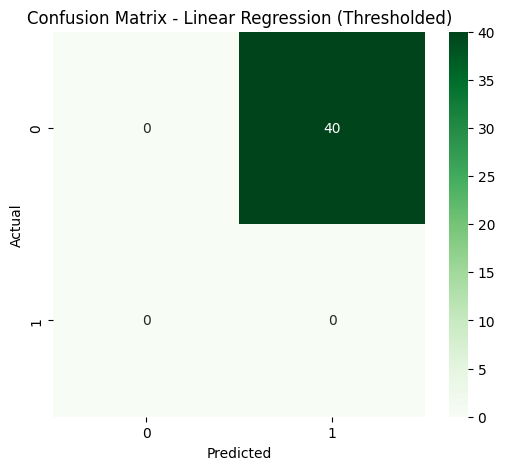

In [166]:
# Define a threshold for "Fast" vs "Delayed", e.g., 30 mins
# y_test_class was created in cell rucKMd4Y53VA

# Binarize the predictions from the Linear Regression model based on the same threshold
y_pred_lr_class = (y_pred > 30).astype(int)

cm_lr = confusion_matrix(y_test_class, y_pred_lr_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Linear Regression (Thresholded)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [167]:

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lr = lin_reg.predict(X_test)

# Evaluate
print("🔢 Linear Regression Evaluation:")
print("📐 MSE:", mean_squared_error(y_test, y_pred_lr))
print("📏 MAE:", mean_absolute_error(y_test, y_pred_lr))
print("📊 R² Score:", r2_score(y_test, y_pred_lr))


🔢 Linear Regression Evaluation:
📐 MSE: 5011.661619205139
📏 MAE: 70.5458260546864
📊 R² Score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🧠 Logistic Regression Evaluation:
✅ Accuracy: 0.0
🎯 Precision: 0.0
🔁 Recall: 0.0
📊 F1-score: 0.0
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      40.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      40.0
   macro avg       0.00      0.00      0.00      40.0
weighted avg       0.00      0.00      0.00      40.0

🧩 Confusion Matrix:
 [[ 0 40]
 [ 0  0]]


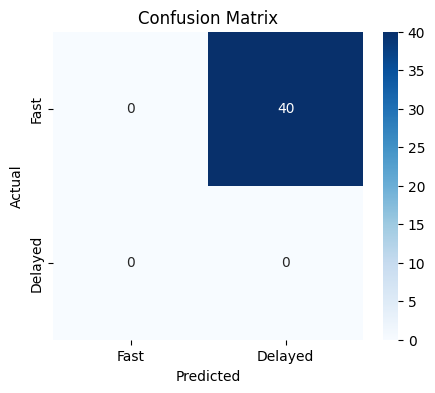

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


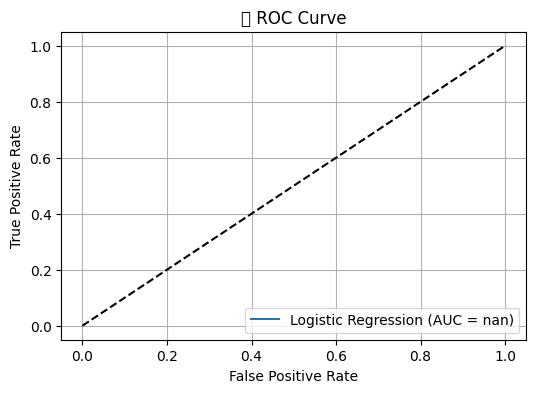

In [169]:

# Define a threshold for "Fast" vs "Delayed", e.g., 30 mins
threshold = 30

# Create categorical target variables for classification
y_class_train = (y_train > threshold).astype(int)
y_class_test = (y_test > threshold).astype(int)

# Train the classifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_class_train)

# Predict
y_pred_class = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("🧠 Logistic Regression Evaluation:")
print("✅ Accuracy:", accuracy_score(y_class_test, y_pred_class))
print("🎯 Precision:", precision_score(y_class_test, y_pred_class))
print("🔁 Recall:", recall_score(y_class_test, y_pred_class))
print("📊 F1-score:", f1_score(y_class_test, y_pred_class))
print("📋 Classification Report:\n", classification_report(y_class_test, y_pred_class))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_class_test, y_pred_class))

# Confusion Matrix plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_class_test, y_pred_class), annot=True, fmt='d', cmap='Blues', xticklabels=["Fast", "Delayed"], yticklabels=["Fast", "Delayed"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_class_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()